# Melbourne Housing Market: Exploratory Data Analysis & Feature Engineering

This notebook focuses on understanding the structure of the Melbourne Housing dataset
and preparing it for downstream machine learning models through statistical analysis and feature
engineering.

> ⚠️ Note: This notebook prioritizes exploratory clarity and statistical reasoning over
> production-level optimization.


### Project Scope

This project focuses exclusively on:
- Exploratory Data Analysis (EDA)
- Statistical inspection of feature distributions
- Categorical encoding and numerical transformations

No predictive models are trained in this notebook.


## 1. Data Loading and Initial Inspection
We begin by loading the full dataset and isolating key variables to understand the underlying structure and identify missing values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [4]:
data = data['Distance']

In [5]:
len(data)

34857

In [6]:
data.isnull().sum()

np.int64(1)

In [7]:
data = data.dropna()

## 2. Univariate Analysis: Exploring 'Distance'
We analyze the distribution of property distances from the CBD using histograms, KDE, and central tendency markers (Mean, Median, and Mode) to identify the "shape" of our data.

(array([1.060e+02, 6.060e+02, 1.339e+03, 1.454e+03, 1.519e+03, 2.148e+03,
        2.364e+03, 1.690e+03, 2.834e+03, 1.990e+03, 2.403e+03, 2.753e+03,
        1.839e+03, 1.391e+03, 2.474e+03, 1.326e+03, 9.680e+02, 8.250e+02,
        7.650e+02, 3.700e+02, 4.150e+02, 6.250e+02, 3.750e+02, 3.580e+02,
        1.540e+02, 2.540e+02, 2.390e+02, 8.600e+01, 2.170e+02, 5.600e+01,
        7.200e+01, 1.100e+01, 2.930e+02, 1.100e+01, 8.000e+00, 3.100e+01,
        1.600e+02, 0.000e+00, 2.700e+01, 1.740e+02, 7.000e+00, 2.000e+00,
        1.800e+01, 0.000e+00, 0.000e+00, 3.100e+01, 2.000e+00, 3.300e+01,
        0.000e+00, 3.300e+01]),
 array([ 0.   ,  0.962,  1.924,  2.886,  3.848,  4.81 ,  5.772,  6.734,
         7.696,  8.658,  9.62 , 10.582, 11.544, 12.506, 13.468, 14.43 ,
        15.392, 16.354, 17.316, 18.278, 19.24 , 20.202, 21.164, 22.126,
        23.088, 24.05 , 25.012, 25.974, 26.936, 27.898, 28.86 , 29.822,
        30.784, 31.746, 32.708, 33.67 , 34.632, 35.594, 36.556, 37.518,
        38.48 , 

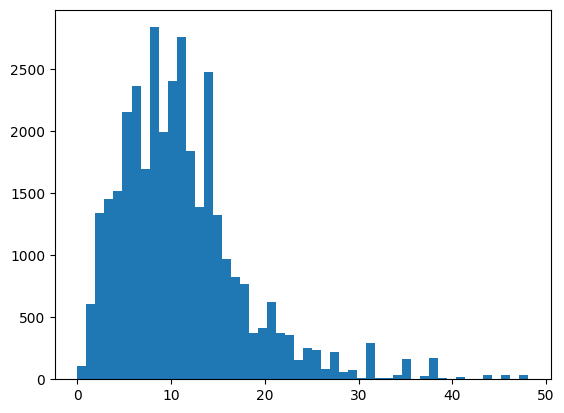

In [8]:
plt.hist(data, bins=50)

<Axes: xlabel='Distance', ylabel='Density'>

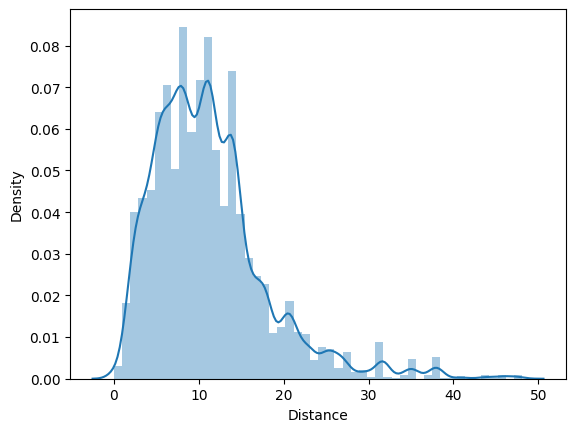

In [9]:
sns.distplot(data)

<Axes: xlabel='Distance', ylabel='Density'>

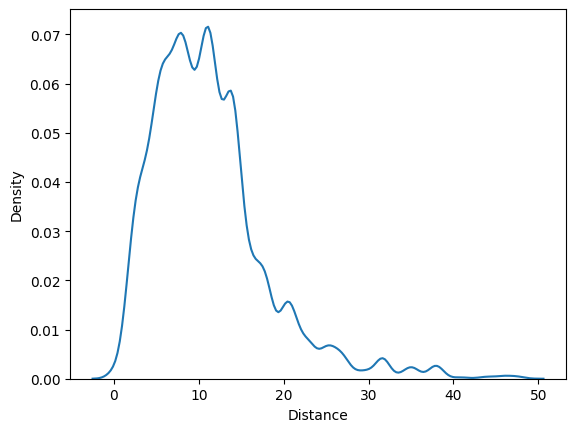

In [10]:
sns.distplot(data, hist=False)

<Axes: ylabel='Distance'>

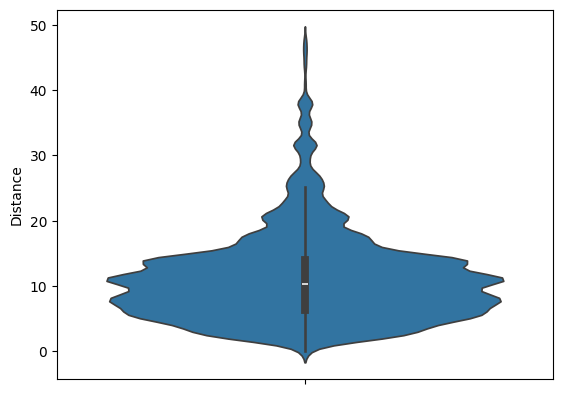

In [11]:
sns.violinplot(data)

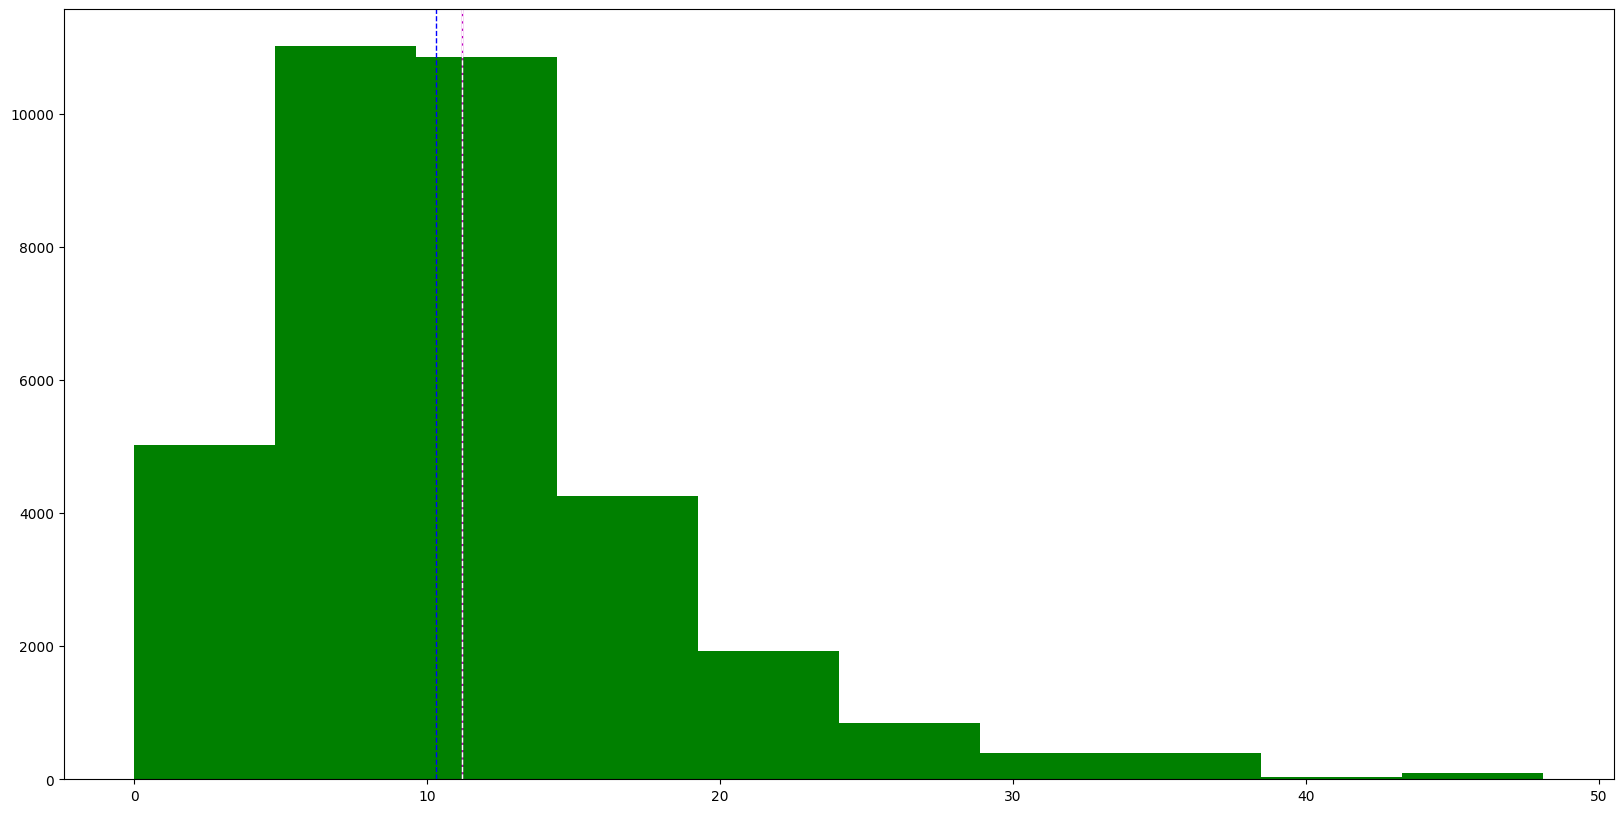

In [12]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(data, color='g') # plots a simple histogram
plt.axvline(data.mean(), color='m', linewidth=1)
plt.axvline(data.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(data.mode()[0], color='w', linestyle='dashed', linewidth=1)

### Cumulative Distribution

<Axes: xlabel='Distance', ylabel='Density'>

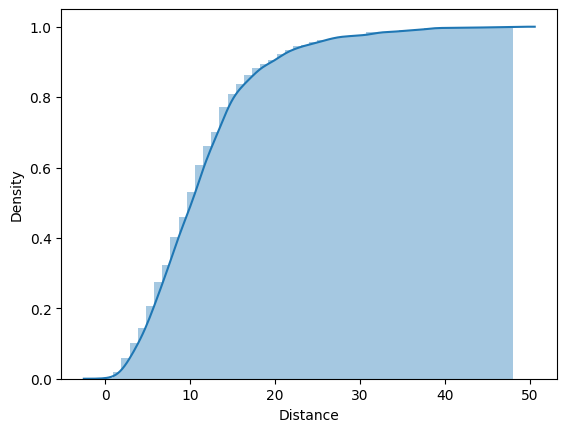

In [13]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

## 3. Multivariate Analysis: Relationship Mapping
In this section, we explore how variables interact. We use **Pairplots** for a general overview and **Heatmaps** to quantify the correlation between price, distance, and other numeric features.

In [14]:
data1 = pd.read_csv('Melbourne_housing_FULL.csv')
data1.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [15]:
data1 = data1.dropna()

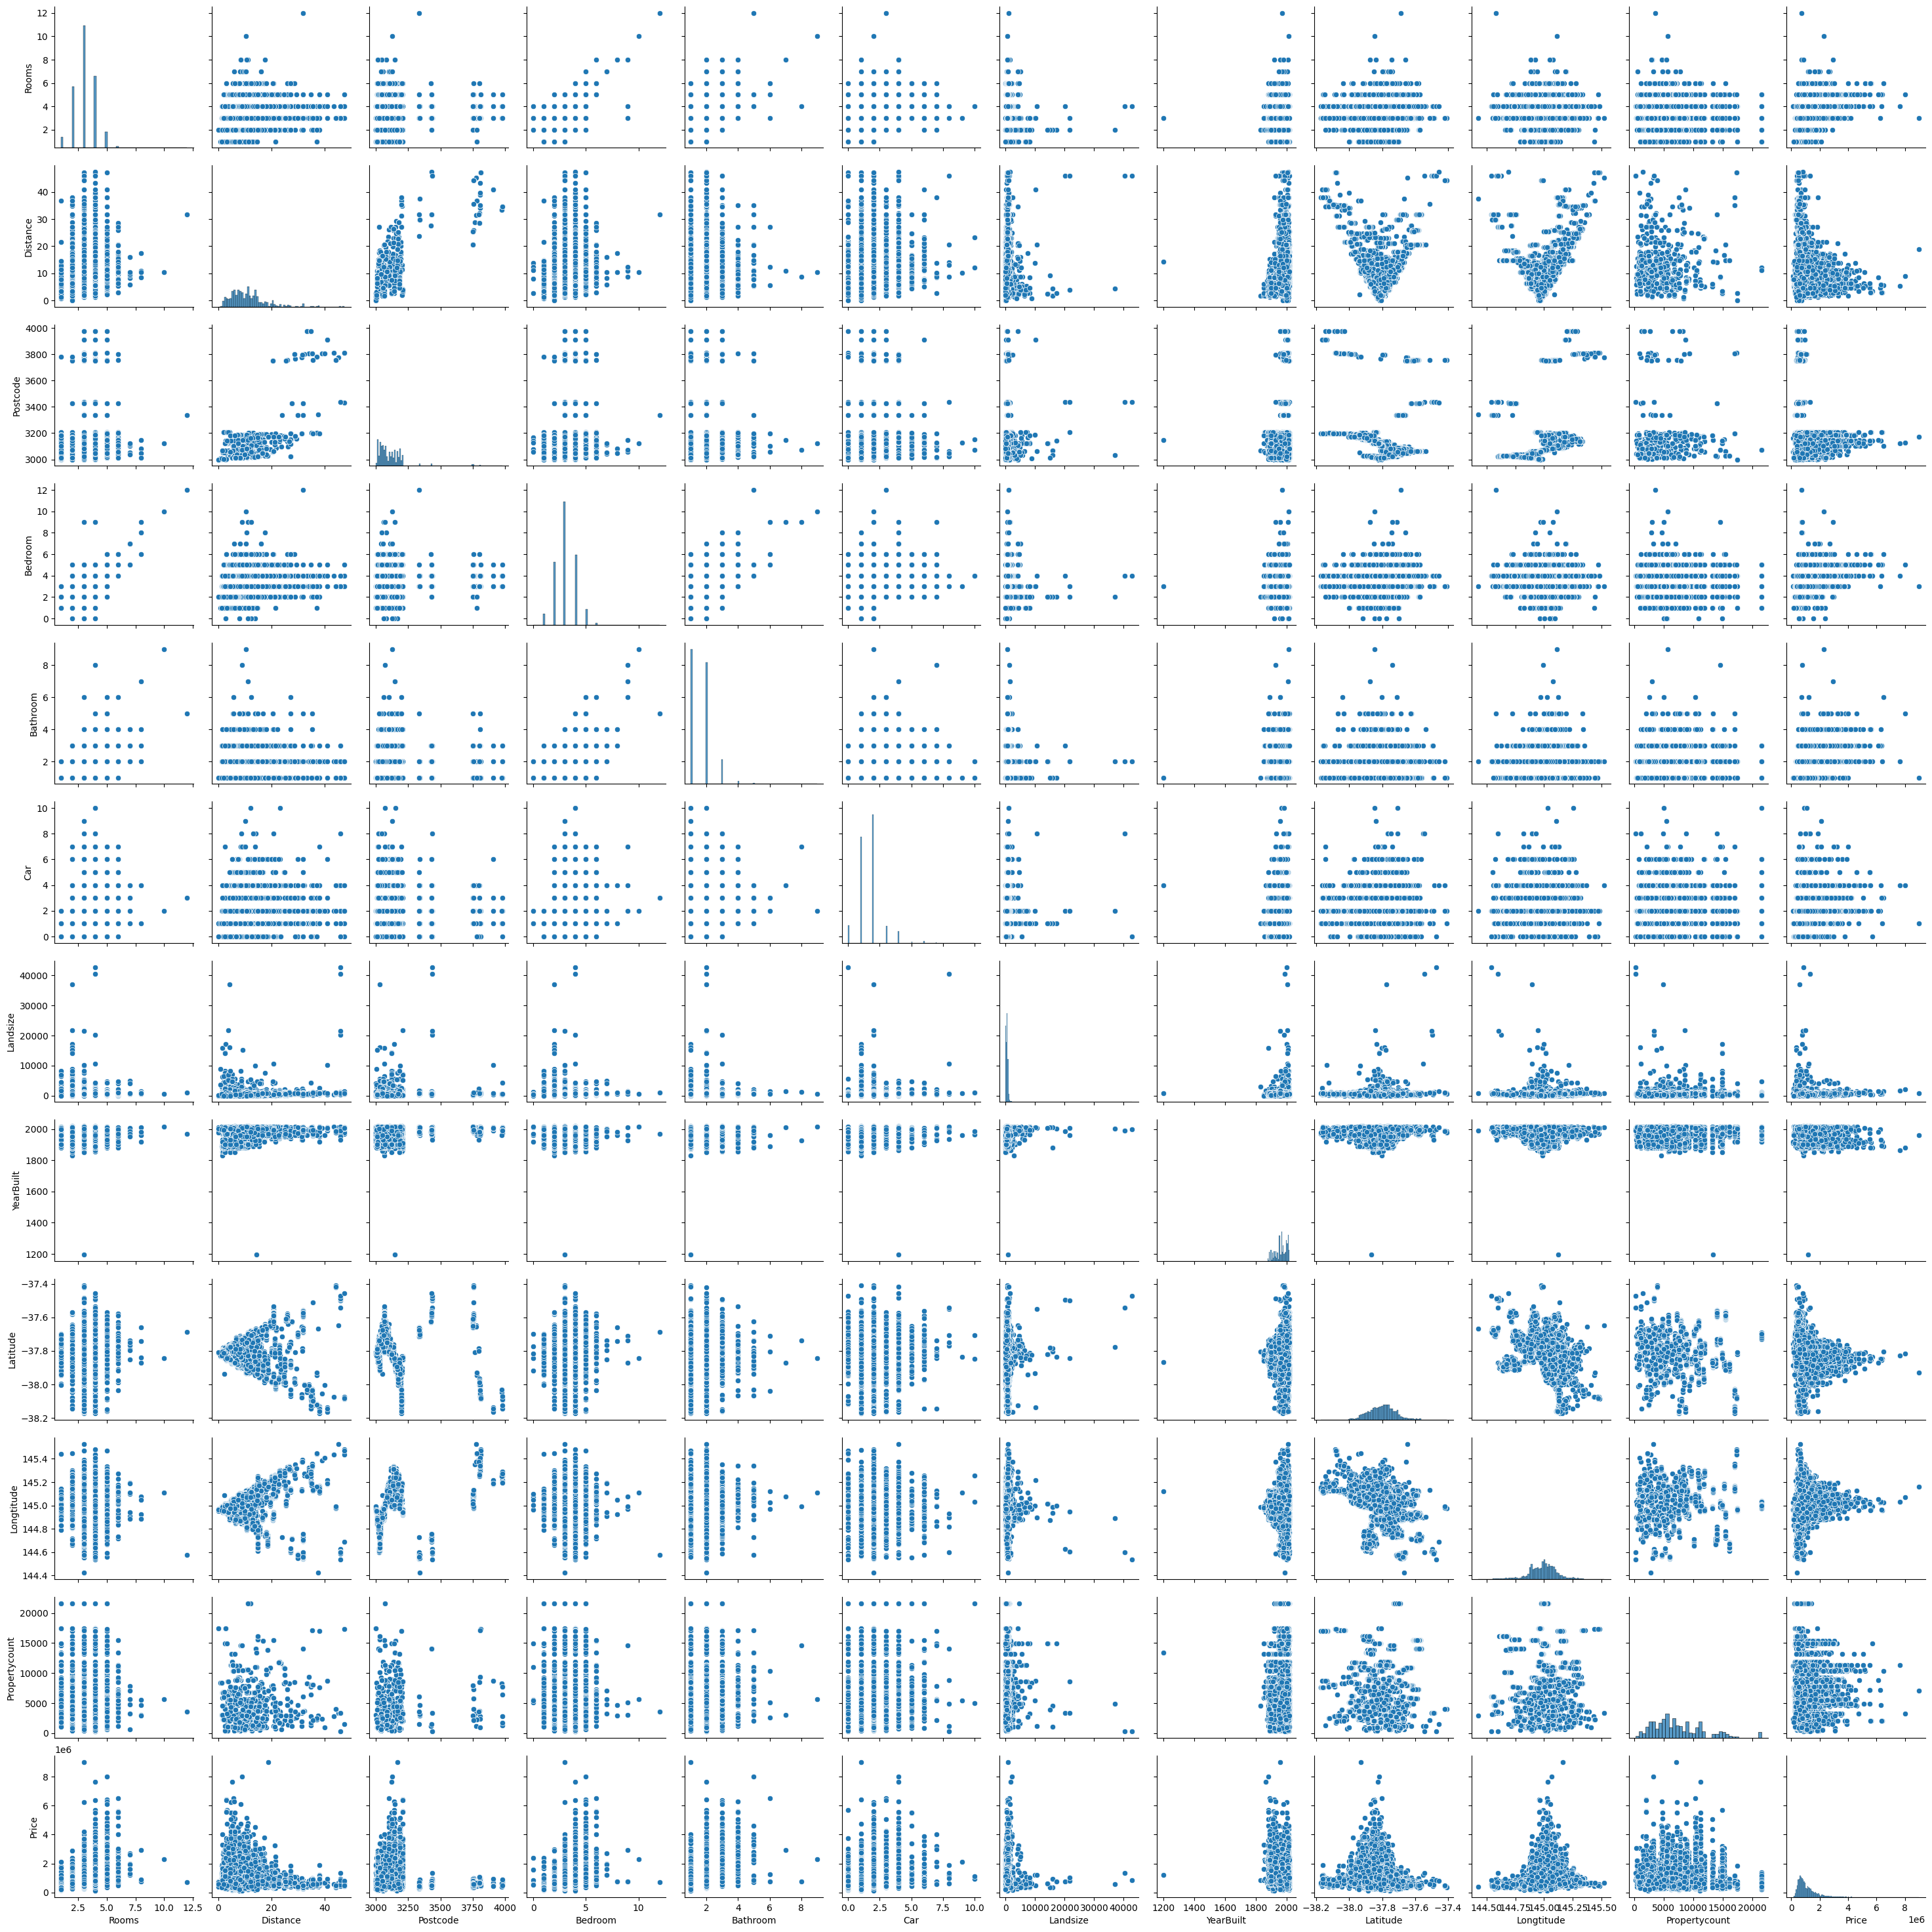

In [16]:
sns.pairplot(data1)

<Axes: xlabel='Price', ylabel='Distance'>

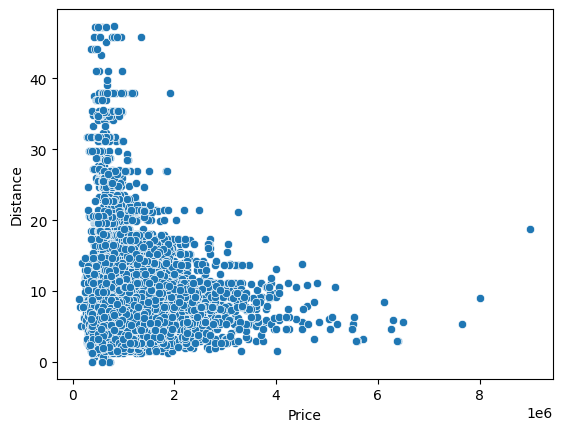

In [17]:
sns.scatterplot(x=data1['Price'], y=data1['Distance'])

In [18]:
data1.corr(numeric_only=True)

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
Rooms,1.000000,0.276490,0.084078,0.964475,0.624138,0.401395,0.101178,0.006944,0.019001,0.082831,-0.082604,0.475096
Distance,0.276490,1.000000,0.489550,0.283365,0.122035,0.259328,0.138568,0.313238,-0.055374,0.163922,-0.003173,-0.231222
Postcode,0.084078,0.489550,1.000000,0.087130,0.111470,0.055520,0.069603,0.089862,-0.195195,0.358014,0.032741,0.045962
Bedroom,0.964475,0.283365,0.087130,1.000000,0.626560,0.405543,0.101054,0.016320,0.022983,0.082491,-0.081207,0.460906
Bathroom,0.624138,0.122035,0.111470,0.626560,1.000000,0.310975,0.075939,0.192965,-0.041642,0.109141,-0.058255,0.463524
Car,0.401395,0.259328,0.055520,0.405543,0.310975,1.000000,0.123466,0.139322,0.015157,0.035530,-0.031244,0.209439
Landsize,0.101178,0.138568,0.069603,0.101054,0.075939,0.123466,1.000000,0.037696,0.042509,-0.008211,-0.032504,0.058394
YearBuilt,0.006944,0.313238,0.089862,0.016320,0.192965,0.139322,0.037696,1.000000,0.100042,-0.026872,0.017093,-0.313629
Latitude,0.019001,-0.055374,-0.195195,0.022983,-0.041642,0.015157,0.042509,0.100042,1.000000,-0.345845,0.029863,-0.224117
Longtitude,0.082831,0.163922,0.358014,0.082491,0.109141,0.035530,-0.008211,-0.026872,-0.345845,1.000000,0.026186,0.212117


<Axes: >

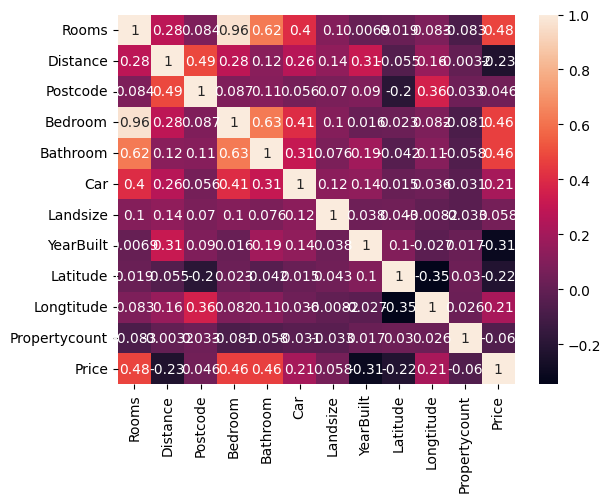

In [19]:
sns.heatmap(data1.corr(numeric_only=True), annot=True)

<Axes: xlabel='Distance', ylabel='Price'>

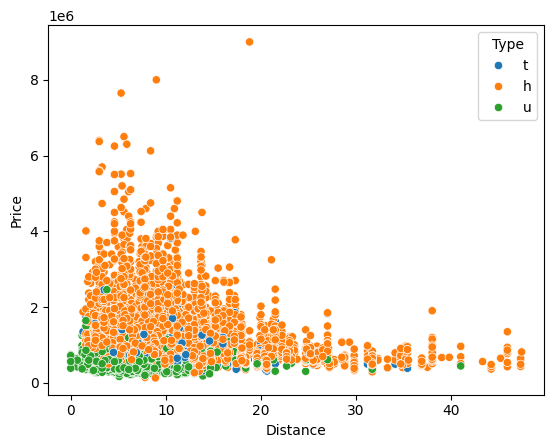

In [20]:
sns.scatterplot(x=data1['Distance'], y=data1['Price'], hue=data1['Type'], palette=None)

## 4. Categorical Data Engineering
Machine learning models require numerical input. Here, we demonstrate:
- **One-Hot Encoding** for nominal variables (Parking Area)
- **Categorical Encoding techniques** applied to regional categories


In [21]:
df_dummies = pd.get_dummies(data1, prefix='Park', columns=['ParkingArea'])
df_dummies.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Propertycount,Price,Park_Attached Garage,Park_Carport,Park_Detached Garage,Park_Indoor,Park_Outdoor Stall,Park_Parkade,Park_Parking Pad,Park_Underground
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,3464.0,840000.0,False,False,True,False,False,False,False,False
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,3280.0,1275000.0,True,False,False,False,False,False,False,False
5,Alphington,6 Smith St,4,h,S,Brace,3/9/2016,6.4,3078.0,3.0,...,2211.0,2000000.0,False,False,False,False,False,False,False,True
6,Alphington,5/6 Yarralea St,3,h,S,Jellis,3/9/2016,6.4,3078.0,3.0,...,2211.0,1110000.0,False,False,False,False,True,False,False,False
7,Altona,158 Queen St,3,h,VB,Greg,3/9/2016,13.8,3018.0,3.0,...,5301.0,520000.0,False,False,False,False,False,False,True,False


In [22]:
df_dummies.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Price', 'Park_Attached Garage',
       'Park_Carport', 'Park_Detached Garage', 'Park_Indoor',
       'Park_Outdoor Stall', 'Park_Parkade', 'Park_Parking Pad',
       'Park_Underground'],
      dtype='str')

In [49]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_dummies['Regionname'] = labelencoder.fit_transform(df_dummies.Regionname)

In [24]:
df_dummies['Regionname'].head()

1    6
2    5
5    2
6    2
7    6
Name: Regionname, dtype: int64

In [25]:
df_dummies['Regionname'].value_counts()

Regionname
5    2709
2    2613
6    2059
0     982
4     371
3      62
1      51
7      43
Name: count, dtype: int64

In [26]:
df_dummies['Regionname'].unique()

array([6, 5, 2, 0, 4, 3, 1, 7])

In [27]:
from sklearn.preprocessing import OneHotEncoder
hotencoder=OneHotEncoder()
encoded=hotencoder.fit_transform(df_dummies.Regionname.values.reshape(-1,1)).toarray()
encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], shape=(8890, 8))

In [28]:
encoded.shape

(8890, 8)

# Convert the array in a Hot Encoder DataFrame

In [29]:
df_encoded = pd.DataFrame(encoded, columns=['Regionname_'+str(int(i)) for i in range(encoded.shape[1])])
df_encoded.head()

,Regionname_0,Regionname_1,Regionname_2,Regionname_3,Regionname_4,Regionname_5,Regionname_6,Regionname_7
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
df_encoded.shape

(8890, 8)

In [31]:
df_dummies = pd.concat([df_dummies, df_encoded], axis=1) # Concats two DataFrames

In [32]:
df_dummies.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Park_Parking Pad,Park_Underground,Regionname_0,Regionname_1,Regionname_2,Regionname_3,Regionname_4,Regionname_5,Regionname_6,Regionname_7
1,Airport West,154 Halsey Rd,3.0,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,False,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Albert Park,105 Kerferd Rd,2.0,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,False,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,Alphington,6 Smith St,4.0,h,S,Brace,3/9/2016,6.4,3078.0,3.0,...,False,True,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Alphington,5/6 Yarralea St,3.0,h,S,Jellis,3/9/2016,6.4,3078.0,3.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,Altona,158 Queen St,3.0,h,VB,Greg,3/9/2016,13.8,3018.0,3.0,...,True,False,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 5. Feature Scaling & Data Normalization
To ensure that features with larger magnitudes do not dominate the model, we apply:
* **StandardScaler:** Centering data around a mean of 0.
* **MinMaxScaler:** Compressing features into a fixed range [0, 1].
* **Function Transformers:** Using Log-transformation to reduce skewness and Exponential mapping.

In [33]:
# Scales the data. Essencially returns the z-score of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [34]:
data1['Bedroom_stdscale'] = std_scale.fit_transform(data1[['Bedroom']])
data1['Bedroom_stdscale'].head()

1   -0.080681
2   -1.115676
5   -0.080681
6   -0.080681
7   -0.080681
Name: Bedroom_stdscale, dtype: float64

In [35]:
data1['Bedroom_stdscale'].min(), data1['Bedroom_stdscale'].max()

(np.float64(-3.1856679331239324), np.float64(9.234280724028467))

In [36]:
data1['Bedroom_stdscale'].describe()

count    8.890000e+03
mean     7.672902e-17
std      1.000056e+00
min     -3.185668e+00
25%     -1.115676e+00
50%     -8.068077e-02
75%      9.543150e-01
max      9.234281e+00
Name: Bedroom_stdscale, dtype: float64

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [38]:
data1['Car_MinMaxScale'] = minmax_scale.fit_transform(data1[['Car']])
data1['Car_MinMaxScale'].head()

1    0.1
2    0.0
5    0.4
6    0.2
7    0.1
Name: Car_MinMaxScale, dtype: float64

In [39]:
data1['Car_MinMaxScale'].min(), data1['Car_MinMaxScale'].max()

(np.float64(0.0), np.float64(1.0))

In [40]:
data1['Car_MinMaxScale'].describe()

count    8890.000000
mean        0.169224
std         0.097534
min         0.000000
25%         0.100000
50%         0.200000
75%         0.200000
max         1.000000
Name: Car_MinMaxScale, dtype: float64

In [41]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p)
log_transformer

,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<ufunc 'log1p'>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to func... versionadded:: 0.18",None
,"inv_kw_args inv_kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to inverse_func... versionadded:: 0.18",None


In [42]:
data1['Distance'].isnull().sum()

np.int64(0)

In [43]:
data1['Distance'] = data1['Distance'].fillna(data1['Distance'].mean())

In [44]:
data1['Distance_logtransform'] = log_transformer.fit_transform(data1[['Distance']])
data1['Distance_logtransform'].head()

1    2.674149
2    1.458615
5    2.001480
6    2.001480
7    2.694627
Name: Distance_logtransform, dtype: float64

In [45]:
data1['Distance_logtransform'].describe()

count    8890.000000
mean        2.356024
std         0.550826
min         0.000000
25%         2.001480
50%         2.415914
75%         2.701361
max         3.879500
Name: Distance_logtransform, dtype: float64

# Exponential Transformations

In [46]:
exp_transformer = FunctionTransformer(np.exp)
exp_transformer

,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<ufunc 'exp'>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to func... versionadded:: 0.18",None
,"inv_kw_args inv_kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to inverse_func... versionadded:: 0.18",None


In [47]:
data1['Rooms_exptrans'] = exp_transformer.fit_transform(data1[['Rooms']])
data1['Rooms_exptrans'].head()

1    20.085537
2     7.389056
5    54.598150
6    20.085537
7    20.085537
Name: Rooms_exptrans, dtype: float64

In [48]:
data1['Rooms_exptrans'].describe()

count      8890.000000
mean         57.862291
std        1743.357006
min           2.718282
25%           7.389056
50%          20.085537
75%          54.598150
max      162754.791419
Name: Rooms_exptrans, dtype: float64

## 6. Conclusion and Key Findings

Through this exploratory and preprocessing phase, we have achieved:
* **Data Integrity:** Handled missing values via dropping and mean imputation where appropriate.
* **Feature Engineering:** Converted categorical regions and parking data into model-ready numerical formats.
* **Distribution Optimization:** Successfully applied Log-transformation to the 'Distance' feature to mitigate the impact of outliers and skewness.
* **Standardization:** Normalized feature scales using Z-score and Min-Max techniques, ensuring compatibility with distance-based algorithms.

**This processed dataset is now ready for the Machine Learning Modeling phase.**

This workflow reflects a typical preprocessing stage in real-world data science projects.
